<div align="center" style=" font-size: 80%; text-align: center; margin: 0 auto">
<img src="https://raw.githubusercontent.com/Explore-AI/Pictures/master/Python-Notebook-Banners/Exercise.png"  style="display: block; margin-left: auto; margin-right: auto;";/>
</div>

# Exercise: Testing model performance
© ExploreAI Academy

In this exercise, we will use the train-test split technique to separate a dataset into training and testing sets and use them to train and test the performance of a model.

## Learning objectives

By the end of this train, you should be able to:
* Create separate train and test sets for both the predictor and response variables.
* Train a model on the training data.
* Assess and compare the model's performance on both the training and testing sets. 

## Exercises

In the exercises below, we will be using the `crop_yield_dataset` which consists of observations on `Temperature` (independent variable) and the corresponding `Crop_Yield` (dependent variable). Temperature is measured in degrees and crop yield is measured in units specific to the crop being studied. 

### Import libraries and dataset

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [3]:
# Load dataset
df= pd.read_csv("https://raw.githubusercontent.com/Explore-AI/Public-Data/master/Data/Python/crop_yield_dataset.csv")
df.head(5)

,Temperature,Crop_Yield
0,27.483571,58.922301
1,24.308678,44.070420
2,28.238443,63.490857
3,32.615149,58.221043
4,23.829233,50.592752


### Exercise 1

Separate the dataset we have loaded into features `X` and the response variable `y`.

In [4]:
# Your solution here... 
X = df[["Temperature"]]
y = df["Crop_Yield"]

### Exercise 2

Implement a train-test split where 80% of the observations will be used for training while the remaining 20% will be used for testing to create the following sets: `X_train`, `X_test`, `y_train`, and `y_test`.
Also, use a random state of `42`.

In [5]:
# Your solution here...
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Exercise 3

Train a linear regression model on the training set we have created in Exercise 2.

<Axes: xlabel='Temperature', ylabel='Crop_Yield'>

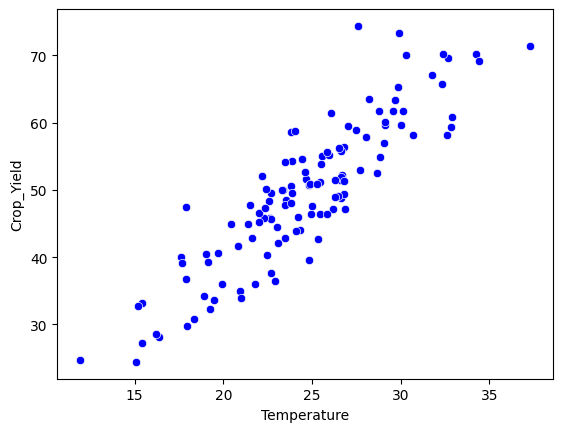

In [10]:
# Your solution here...
import seaborn as sns 
sns.scatterplot(df, x="Temperature", y="Crop_Yield", color='blue')

In [11]:
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


### Exercise 4

Assess the model's performance on the training by calculating the **Mean Squared Error (MSE)** and **R-squared** metrics.

In [12]:
# Your solution here...
y_train_predicted = model.predict(X_train) 

mse = metrics.mean_squared_error(y_train, y_train_predicted)
r2_score = metrics.r2_score(y_train, y_train_predicted) 

print(f"MSE: {mse}\nR2 Score: {r2_score}")

MSE: 22.152323850480098
R2 Score: 0.8025918031520605


### Exercise 5

Assess the model's performance on the testing set by calculating the **Mean Squared Error (MSE)** and **R-squared** metrics.

In [13]:
# Your solution here...
y_test_predicted = model.predict(X_test) 

mse_test = metrics.mean_squared_error(y_test, y_test_predicted)
r2_score_test = metrics.r2_score(y_test, y_test_predicted) 

print(f"MSE Test: {mse_test}\nR2 Score Test: {r2_score_test}")

MSE Test: 37.75854546183867
R2 Score Test: 0.7167858892114612


> Compare the model's performance on the training and testing sets. Are there any observed differences?

`Looking at the Performance on Training and Testing tests, Key obsersavations were found as follows;`

- `High R2 Score (80%) on Training Set but Low R2 Score (71%) on Testing set` 

- `A Low MSE on Training Set but a High MSE on Testing Set` 

`This observations means that the model was able to perform well on training data but performances drops on new unseen data`

`The model memorized the noise and quirks of the training data rather than the generalized patterns making it difficult to make generalizations on new unseen data. This means that the prediction power of the model depens on the specific data it was trained on`

## Solutions

### Exercise 1

In [14]:
# Split dataset into features and response variable
X = df[['Temperature']]
y = df['Crop_Yield']

X is a DataFrame containing only the `Temperature` column, which serves as the predictor variable.

y is a Series containing the `Crop_Yield` column, which serves as the response or target variable.

### Exercise 2

In [15]:
# Perform train-test split with 80-20 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

We use the `train_test_split` function to divide the dataset into training and testing sets for both the features (X) and the response variable (y).

The `0.2` test_size indicates that 20% of the data will be used for testing, while the remaining 80% will be used for training.

We use a random_state of `42` to ensure reproducibility of the split.

### Exercise 3

In [16]:
# Create an instance of the LinearRegression class
lm = LinearRegression()

# Train the linear regression model
lm.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


We create a LinearRegression object and fit it to the training data only which includes the independent variables: `X_train` and the dependent variables: `y_train`.

### Exercise 4

In [17]:
# Generate predictions on the training set
y_train_pred = lm.predict(X_train)

# Calculate the Mean Squared Error (MSE)
train_mse = metrics.mean_squared_error(y_train, y_train_pred)

# Calculate the R-squared
train_r2 = metrics.r2_score(y_train, y_train_pred)

# Print the training MSE and R-squared score
print("Training MSE:", train_mse)
print("Training R-squared:", train_r2)

Training MSE: 22.152323850480098
Training R-squared: 0.8025918031520605


We first ask the trained linear regression model to generate predictions on the training set of predictors `X_train`.

We then pass the actual target values `y_train` and the predicted target values `y_train_pred` to the `metrics.mean_squared_error()` and the `metrics.r2_score()` functions to calculate the respective metrics.

### Exercise 5

In [18]:
# Generate predictions on the testing set
y_test_pred = lm.predict(X_test)

# Calculate the Mean Squared Error (MSE)
test_mse = metrics.mean_squared_error(y_test, y_test_pred)

# Calculate the R-squared
test_r2 = metrics.r2_score(y_test, y_test_pred)

# Print the testing MSE and R-squared score
print("Testing MSE:", test_mse)
print("Testing R-squared:", test_r2)

Testing MSE: 37.75854546183867
Testing R-squared: 0.7167858892114612


We first ask the trained linear regression model to generate predictions on the testing set of predictors `X_test`.

We then pass the actual target values `y_test` and the predicted target values `y_test_pred` to the `metrics.mean_squared_error()` and the `metrics.r2_score()` functions to calculate the respective metrics.

It is worth experimenting with different random states once we have completed the exercise (Try random_state = 50). How do the R-squared and MSE metrics change between the test and training sets? Does the gap get smaller or larger? What does this suggest? Could the relatively small number of observations be affecting these metrics?

<div align="center" style=" font-size: 80%; text-align: center; margin: 0 auto">
<img src="https://raw.githubusercontent.com/Explore-AI/Pictures/master/ExploreAI_logos/EAI_Blue_Dark.png"  style="width:200px";/>
</div>